This is your private sketch-notebook. Do whatever you want with it. When code is ready to be developed, please just copy and paste it to the final notebook. 

In [1]:
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  
from PIL import Image
import glob
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.display import Image
from IPython.display import Image
from IPython.core.display import HTML 


Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# the folder path to the folder with all the fishies in there
folders_path = '../Data/Kaggle/train/*'

# creating a dataframe with the columns below
image_dict = {}

# going through all folders and saving file names in dataframe so that order is always correct
for foldername in glob.glob(folders_path):
    for image_name in glob.glob(foldername + '/*.jpg'):
        # getting image name and fish type and putting it in a dictionary
        fish_type = foldername[-3:]
        image_dict[image_name] = fish_type

image_df = pd.DataFrame(image_dict.items(), columns = ['image_name', 'fish_type']).sample(frac=1) # random sampling
dummy_df = pd.get_dummies(image_df, columns=['fish_type']) # dummify data

dummy_df.head()

,image_name,fish_type_ALB,fish_type_ARK,fish_type_BET,fish_type_DOL,fish_type_HER,fish_type_LAG,fish_type_NoF,fish_type_YFT
2035,../Data/Kaggle/train/YFT/img_05451.jpg,0,0,0,0,0,0,0,1
532,../Data/Kaggle/train/SHARK/img_07056.jpg,0,1,0,0,0,0,0,0
3515,../Data/Kaggle/train/YFT/img_01064.jpg,0,0,0,0,0,0,0,1
3141,../Data/Kaggle/train/NoF/img_00849.jpg,0,0,0,0,0,0,1,0
3074,../Data/Kaggle/train/DOL/img_07212.jpg,0,0,0,1,0,0,0,0


In [4]:
from __future__ import division
#import Image
import math
import os

def long_slice(image_path, out_name, slice_size_hor,slice_size_ver):
    """slice an image into parts slice_size tall"""
    img = image.load_img(image_path,target_size = (224,224))
    width, height = img.size
    upper = 0
    left = 0
    hor_slices = int(math.ceil(height/slice_size_hor)) * 2 - 1
    ver_slices = int(math.ceil(width/slice_size_ver)) * 2 - 1
  
    count_hor = 0
    
    for hor_slice in range(hor_slices):
    
        #print count_hor
        if count_hor == hor_slices:
            lower = height
        else:
            lower = int(slice_size_hor + count_hor * slice_size_hor/2)
        count_ver = 0
        left = 0
        for ver_slice in range(ver_slices):
        #if we are at the end, set the lower bound to be the bottom of the image
            
            #set the bounding box! The important bit     
            if count_ver == ver_slices:
                right = width
            else: 
                right = int(slice_size_ver + count_ver *slice_size_ver/2)
            upper = lower - slice_size_hor
            left = right - slice_size_ver

            bbox = (left, upper, right, lower)
            print left, upper, right, lower
            working_slice = img.crop(bbox)
        
            #save the slice
            plt.imshow(working_slice)
            working_slice.save(os.path.join("test/", "slice_" + str(i) + str(j) + str(count_ver)+str(count_hor)+".png"))
            count_ver +=1
            

            
            
        count_hor += 1

#if __name__ == '__main__':
#    #slice_size is the max height of the slices in pixels


In [5]:
def sliding_window(image, stepSize, windowSize):

    # slide a window across the image

    for y in xrange(0, image.shape[0], stepSize):

        for x in xrange(0, image.shape[1], stepSize):

            # yield the current window

            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [6]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

afmetingen = [(0,0.5,0,0.5),(0.5,1,0,0.5),(0.5,1,0.5,1),(0,0.5,0.5,1)]

/usr/local/lib/python2.7/dist-packages/keras/applications/resnet50.py:222: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image dimension ordering convention (`image_dim_ordering="th"`). For best performance, set `image_dim_ordering="tf"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


0 0 56 56
28 0 84 56
56 0 112 56
84 0 140 56
112 0 168 56
140 0 196 56
168 0 224 56
0 28 56 84
28 28 84 84
56 28 112 84
84 28 140 84
112 28 168 84
140 28 196 84
168 28 224 84
0 56 56 112
28 56 84 112
56 56 112 112
84 56 140 112
112 56 168 112
140 56 196 112
168 56 224 112
0 84 56 140
28 84 84 140
56 84 112 140
84 84 140 140
112 84 168 140
140 84 196 140
168 84 224 140
0 112 56 168
28 112 84 168
56 112 112 168
84 112 140 168
112 112 168 168
140 112 196 168
168 112 224 168
0 140 56 196
28 140 84 196
56 140 112 196
84 140 140 196
112 140 168 196
140 140 196 196
168 140 224 196
0 168 56 224
28 168 84 224
56 168 112 224
84 168 140 224
112 168 168 224
140 168 196 224
168 168 224 224
0 0 112 56
56 0 168 56
112 0 224 56
0 28 112 84
56 28 168 84
112 28 224 84
0 56 112 112
56 56 168 112
112 56 224 112
0 84 112 140
56 84 168 140
112 84 224 140
0 112 112 168
56 112 168 168
112 112 224 168
0 140 112 196
56 140 168 196
112 140 224 196
0 168 112 224
56 168 168 224
112 168 224 224
0 0 56 112
28 0 84 1

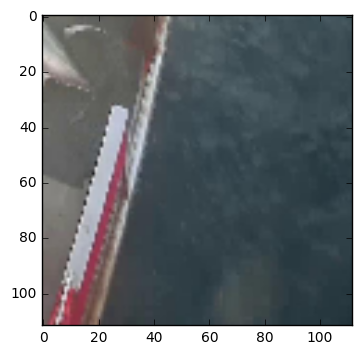

In [18]:
outcome = []
for img_path in image_df.image_name[:1]:
#img_path = 'elephant.jpg'
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    hor = [56,112]
    ver = [56,112]
    for i in hor:
        for j in ver:
            long_slice(img_path, os.getcwd(), i, j)
    #test_files = ['slice_11.png','slice_21.png','slice_12.png','slice_22.png']
    suboutcome = []
    for image_name in glob.glob('test/*.png'):
    #for i in range(4):
        #afmeting = afmetingen[i]
         #   print img.size
        img = image.load_img(image_name, target_size=(224, 224))
        #plt.figure()
        #plt.imshow(img)
        #row = img.size[0]
        #col = img.size[1]
        #print type(img)
          #  img = img.crop((0,112,0,112))
        #img = img.load()
           # print type(img.load())
        #img = img.resize(2,2)
        #plt.imshow(img)
        x = image.img_to_array(img)
        #print x.shape
        
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
        suboutcome.append((img,decode_predictions(preds, top=10)[0]))
    outcome.append(suboutcome)
fish_subimages = []

file = open("fish_labels.txt")
fishlabels = file.readlines()
file.close()

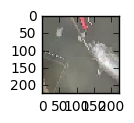

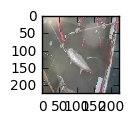

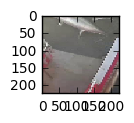

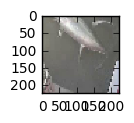

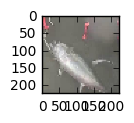

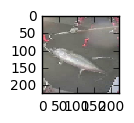

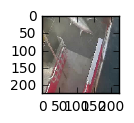

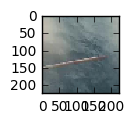

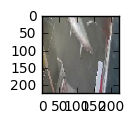

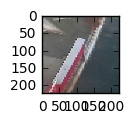

In [19]:
fish_subimaged = []

for suboutcome in outcome:

    for subimage in suboutcome:
       
        #print subimage[1]   
        prediction = subimage[1]
        for p in prediction:
            #print p[0] in fishlabels
            if p[0] in eval(fishlabels[0]):
                
                fish_subimaged.append(subimage[0])
                continue
    
for img in set(fish_subimaged):
    plt.figure(figsize=(1,1))
    plt.imshow(img)
    plt.show()
    
    
    
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

In [9]:
fishlabels

["['n01316579', 'n01316838', 'n01480516', 'n02512752', 'n02512830', 'n02512938', 'n02513248', 'n02513560', 'n02513805', 'n02513939', 'n02514320', 'n02514825', 'n02556373', 'n02599958', 'n02600298', 'n02600503', 'n02600798', 'n01480880', 'n01482071', 'n01481331', 'n01481498', 'n01482330', 'n01495701', 'n01483021', 'n01483522', 'n01486010', 'n01486540', 'n01486838', 'n01487506', 'n01488038', 'n01488385', 'n01488918', 'n01491874', 'n01494475', 'n01495493', 'n01483830', 'n01484097', 'n01484850', 'n01485479', 'n01484285', 'n01484447', 'n01484562', 'n01489501', 'n01489709', 'n01489920', 'n01490112', 'n01490360', 'n01490670', 'n01491006', 'n01491361', 'n01491661', 'n01492357', 'n01493541', 'n01492569', 'n01492708', 'n01492860', 'n01493146', 'n01493829', 'n01494041', 'n01494757', 'n01494882', 'n01495006', 'n01496331', 'n01497118', 'n01497738', 'n01498041', 'n01498989', 'n01500091', 'n01501160', 'n01497413', 'n01498406', 'n01498699', 'n01499396', 'n01499732', 'n01500476', 'n01500854', 'n0150164

In [10]:
file = open("fish_labels.txt")
fishlabels = eval(file.readline())
file.close()
print(fishlabels)



['n01316579', 'n01316838', 'n01480516', 'n02512752', 'n02512830', 'n02512938', 'n02513248', 'n02513560', 'n02513805', 'n02513939', 'n02514320', 'n02514825', 'n02556373', 'n02599958', 'n02600298', 'n02600503', 'n02600798', 'n01480880', 'n01482071', 'n01481331', 'n01481498', 'n01482330', 'n01495701', 'n01483021', 'n01483522', 'n01486010', 'n01486540', 'n01486838', 'n01487506', 'n01488038', 'n01488385', 'n01488918', 'n01491874', 'n01494475', 'n01495493', 'n01483830', 'n01484097', 'n01484850', 'n01485479', 'n01484285', 'n01484447', 'n01484562', 'n01489501', 'n01489709', 'n01489920', 'n01490112', 'n01490360', 'n01490670', 'n01491006', 'n01491361', 'n01491661', 'n01492357', 'n01493541', 'n01492569', 'n01492708', 'n01492860', 'n01493146', 'n01493829', 'n01494041', 'n01494757', 'n01494882', 'n01495006', 'n01496331', 'n01497118', 'n01497738', 'n01498041', 'n01498989', 'n01500091', 'n01501160', 'n01497413', 'n01498406', 'n01498699', 'n01499396', 'n01499732', 'n01500476', 'n01500854', 'n01501641'

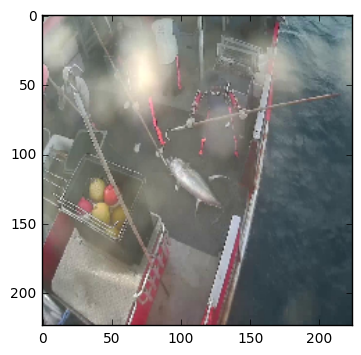

In [11]:
for img_path in image_df.image_name[:1]:
#img_path = 'elephant.jpg'
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)

In [12]:
# Smaller dataset for testing purposes!
dummy_df = dummy_df.iloc[0:101,:]

In [13]:
Image(url= "https://kaggle2.blob.core.windows.net/competitions/kaggle/5568/media/species-ref-key.jpg")

In [14]:
is_a_df = pd.read_csv('is_a.csv',delimiter=' ',header=None)
is_a_df.columns = ['parent','child']

fish_labels = []

def findChildrenFish(df,parent):
    children = is_a_df[is_a_df['parent'] == parent].child
    return children.tolist()

fish = 'n02512053'
children = is_a_df[is_a_df['parent'] == fish].child
fish_labels.append(children)
    


In [15]:
type(childern)

NameError: name 'childern' is not defined

In [ ]:
second_children = []
for child in children:
    second_children.append(findChildrenFish(is_a_df,child))
    fish_labels.append([c for c in second_children if len(c) != 0])


In [ ]:
fish_labels

In [ ]:
[c for c in second_children if c.shape[0]!= 0]
print fish_labels

In [ ]:
# Count of the image types
image_df.groupby('fish_type').count().sort_values('image_name')

In [ ]:
count = 0 # count, to test the algorithm with 100 pictures
images = []

for filename in dummy_df.image_name:
    img = cv2.imread(filename) # Read file    
    img = cv2.resize(img, (224, 224)) # Resize image to 224 x 224 pixels (dont feel obliged to use this)
    img = img.astype(np.float32) # Change to 32 bit floats (good for neural networks, other floats not as much making sense)

    # "Normalize" images
    for rgb_value in [0,1,2]:
        img[:, :, rgb_value] = img[:, :, rgb_value] / 255.0 # 255 is the RGB maximum
        img[:, :, rgb_value] -= numpy.mean(img[:, :, rgb_value])

    img = img.transpose((2,0,1))

    images.append(img)

# X and y value and labels
x = np.asarray(images)
y = dummy_df.iloc[:,1:9].as_matrix()
labels = dummy_df.image_name.apply(lambda path: path[-13:])

# table, just to be sure that everything goes well
dummy_df['image_bytes'] = images
dummy_df.head()

In [ ]:
split_no = 90

x_train = x[:split_no]
y_train = y[:split_no]
labels_train = labels[:split_no]

x_test = x[split_no:]
y_test = y[split_no:]
labels_test = labels[split_no:]

In [ ]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, 224, 224), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
# Compile model
epochs = 1 # dont leave it like this, only for testing!
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

In [ ]:
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), nb_epoch=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
classes = model.predict_proba(x_test, batch_size=32)

# get probability table
proba_df = pd.DataFrame(classes)
proba_df.columns = image_df.groupby('fish_type').count().index # workaround to get column names quickly and in right order

print("Accuracy: %.2f%%" % (scores[1]*100))
print ' '
proba_df

In [ ]:
proba_df['img_names'] = labels_test.values